<a href="https://colab.research.google.com/github/ABHI20-STAT/Numerical-Methods/blob/main/Geometric_Essence_of_Linearization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Linearization is one of the first ideas in calculus that truly behaves like a **method**. Instead of treating a function as an untouchable object whose values must be computed exactly, linearization teaches a new habit of thinking: **near a point, a differentiable curve behaves like a straight line**. This single principle turns many ``hard'' tasks---approximating numbers, solving nonlinear equations, estimating errors, and building fast numerical algorithms---into problems that can be attacked with simple algebra.

## **Replace the Curve by Its Tangent Line**
The core problem governed by linearization is the following:

>**Governing Problem:**
Given a complicated function $f$ and a point $a$ where $f(a)$ and $f'(a)$ are accessible, can we replace $f$ near $a$ by a simpler function that we can compute with easily, while controlling the error?

Geometrically, the replacement is the tangent line. The picture to keep in mind is:

-  You stand at the point $P=(a,f(a))$ on the curve $y=f(x)$.
-  You draw the tangent line at $P$; its slope is $f'(a)$.
-  For inputs $x$ close to $a$, the vertical gap between the curve and the tangent line is small, so

  $$f(x)\approx L_a(x), \qquad L_a(x)=f(a)+f'(a)(x-a).$$

- Because lines are easy to work with, this single picture turns approximation, error estimation, and even numerical algorithms into problems of solving linear equations.

>The next diagram illustrates the idea in its most general form: a differentiable curve, its tangent line at $x=a$, and a nearby point $x$ where the tangent-line value $L_a(x)$ approximates $f(x)$.

'/mnt/data/linearization_static.png'

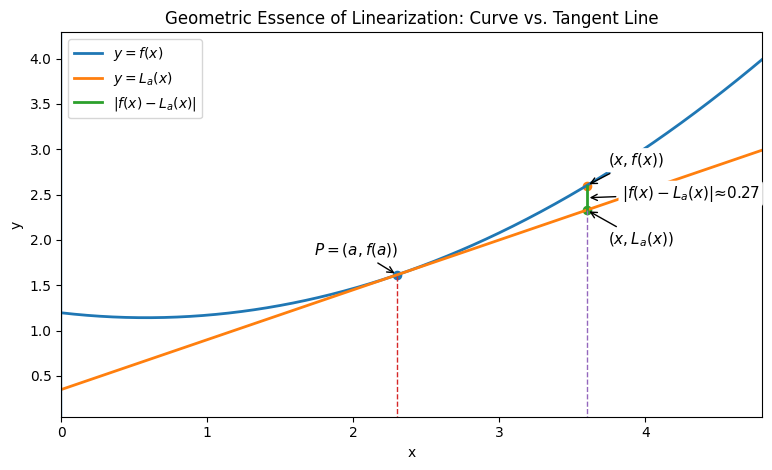

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os # Import the os module

def f(x):
    return 0.35 + 0.55*x + 0.16*(x-2.3)**2

def fp(x):
    return 0.55 + 0.32*(x-2.3)

# Parameters
a = 2.3
x0 = 3.6
xmin, xmax = 0.0, 4.8

xs = np.linspace(xmin, xmax, 600)

fa = f(a)
m = fp(a)
L = lambda t: fa + m*(t-a)

fx0 = f(x0)
Lx0 = L(x0)

# Build plot
plt.figure(figsize=(8, 4.8))
plt.plot(xs, f(xs), linewidth=2, label=r"$y=f(x)$")
plt.plot(xs, L(xs), linewidth=2, label=r"$y=L_a(x)$")

# Axes lines
plt.axhline(0, linewidth=1)
plt.axvline(0, linewidth=1)

# Points
plt.scatter([a], [fa], s=35)
plt.scatter([x0], [fx0], s=35)
plt.scatter([x0], [Lx0], s=35)

# Vertical error segment
plt.plot([x0, x0], [Lx0, fx0], linewidth=2, label=r"$|f(x)-L_a(x)|$")

# Dashed drops
plt.plot([a, a], [0, fa], linestyle="--", linewidth=1)
plt.plot([x0, x0], [0, Lx0], linestyle="--", linewidth=1)

# Labels (offset to reduce overlap)
plt.annotate(r"$P=(a,f(a))$", xy=(a, fa), xytext=(-60, 15),
             textcoords="offset points", fontsize=11,
             bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none"),
             arrowprops=dict(arrowstyle="->", linewidth=1))

plt.annotate(r"$(x,f(x))$", xy=(x0, fx0), xytext=(15, 15),
             textcoords="offset points", fontsize=11,
             bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none"),
             arrowprops=dict(arrowstyle="->", linewidth=1))

plt.annotate(r"$(x,L_a(x))$", xy=(x0, Lx0), xytext=(15, -25),
             textcoords="offset points", fontsize=11,
             bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none"),
             arrowprops=dict(arrowstyle="->", linewidth=1))

err = abs(fx0 - Lx0)
plt.annotate(rf"$|f(x)-L_a(x)|≈ {err:.3g}$",
             xy=(x0, (fx0 + Lx0)/2), xytext=(25, 0),
             textcoords="offset points", fontsize=11,
             bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none"),
             arrowprops=dict(arrowstyle="->", linewidth=1))

# Mark a and x on x-axis
plt.annotate(r"$a$", xy=(a, 0), xytext=(0, -18), textcoords="offset points", ha="center", fontsize=11)
plt.annotate(r"$x$", xy=(x0, 0), xytext=(0, -18), textcoords="offset points", ha="center", fontsize=11)

plt.xlim(xmin, xmax)
# y-limits with padding
yvals = np.concatenate([f(xs), L(xs)])
plt.ylim(min(yvals)-0.3, max(yvals)+0.3)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Geometric Essence of Linearization: Curve vs. Tangent Line")
plt.legend(loc="upper left", frameon=True)
plt.tight_layout()

out_path = "/mnt/data/linearization_static.png"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(out_path), exist_ok=True)

plt.savefig(out_path, dpi=200)
out_path

**Explanation:** The blue curve represents the true function values $y=f(x)$, while the orange line represents the *linearization* (tangent-line approximation) of $f$ at the base point $a$,

$$ L_a(x)=f(a)+f'(a)(x-a).$$
    
The marked point $P=(a,f(a))$ is the point of tangency, so the line agrees with the function both in value and slope at $x=a$: $L_a(a)=f(a)$ and $L_a'(a)=f'(a)$. For a nearby input $x$, the diagram highlights two points with the same
horizontal coordinate: $(x,f(x))$ on the curve (the exact value) and $(x,L_a(x))$ on the tangent line (the approximated value). The green vertical segment between these points is the approximation error

$$ |f(x)-L_a(x)|,$$
    
i.e.\ the vertical gap produced by replacing the curve with its tangent line. The dashed vertical lines simply locate the inputs $a$ and $x$ on the $x$-axis. The picture encodes the main principle of linearization: when $x$ is close to $a$,the curve is nearly straight at the scale of interest, so $f(x)\approx L_a(x)$; as $x$ moves away from $a$, curvature causes the curve to deviate from the tangent line and the error grows. Under mild smoothness (e.g.\ $f\in C^2$), Taylor's theorem makes this quantitative by showing that the error is typically second order in the displacement:
$$f(x)-L_a(x)=\frac{f''(\xi)}{2}(x-a)^2 \quad\text{for some }\xi \text{ between }a\text{ and }x,$$
    
which explains why linearization becomes rapidly more accurate as $|x-a|$ decreases.

In [ ]:
import numpy as np
import plotly.graph_objects as go

def f(x):
    return 0.35 + 0.55*x + 0.16*(x-2.3)**2

def fp(x):
    # derivative of 0.35 + 0.55x + 0.16(x-2.3)^2
    return 0.55 + 0.32*(x-2.3)

def make_linearization_figure(a=2.3, x=3.6, x_min=0.0, x_max=4.8, n=400):
    xs = np.linspace(x_min, x_max, n)
    ys = f(xs)

    fa = f(a)
    m = fp(a)
    L = lambda t: fa + m*(t-a)

    # for plotting tangent line over a window
    ysL = L(xs)

    fx = f(x)
    Lx = L(x)

    fig = go.Figure()

    # curve and tangent
    fig.add_trace(go.Scatter(x=xs, y=ys, mode="lines", name="y=f(x)"))
    fig.add_trace(go.Scatter(x=xs, y=ysL, mode="lines", name="y=L_a(x)"))

    # points
    fig.add_trace(go.Scatter(x=[a], y=[fa], mode="markers+text",
                             text=["P=(a,f(a))"], textposition="top left",
                             name="Base point P"))
    fig.add_trace(go.Scatter(x=[x], y=[fx], mode="markers+text",
                             text=["(x,f(x))"], textposition="top right",
                             name="Point on curve"))
    fig.add_trace(go.Scatter(x=[x], y=[Lx], mode="markers+text",
                             text=["(x,L_a(x))"], textposition="bottom right",
                             name="Point on tangent"))

    # vertical error segment
    fig.add_trace(go.Scatter(x=[x, x], y=[Lx, fx], mode="lines",
                             name="|f(x)-L_a(x)|"))

    # dashed drops to x-axis
    fig.add_trace(go.Scatter(x=[a, a], y=[0, fa], mode="lines",
                             line=dict(dash="dash"), name="a (drop)"))
    fig.add_trace(go.Scatter(x=[x, x], y=[0, Lx], mode="lines",
                             line=dict(dash="dash"), name="x (drop)"))

    # annotate error value
    err = abs(fx - Lx)
    fig.add_annotation(x=x, y=(fx+Lx)/2, text=f"|f(x)-L_a(x)| ≈ {err:.4g}",
                       showarrow=True, arrowhead=2, ax=40, ay=0)

    # styling
    fig.update_layout(
        title="Linearization as Tangent Line (interactive hover)",
        xaxis_title="x",
        yaxis_title="y",
        hovermode="x unified",
        showlegend=True,
        height=520
    )

    return fig

fig = make_linearization_figure()
fig


## **Algorithmic & Programming Essence of the Plotly Linearization Graph**

This Plotly visualization is not “just a picture.” It is a **computational pipeline** that turns the calculus idea of linearization into something you can **compute, test, and diagnose**.

---

### **What the Graph Computes (Algorithmically)**

**Inputs**
- A differentiable function $f$
- A base point $a$ (where you linearize)
- A nearby point $x$ (where you test the approximation)

#### **Step 1: Sample the Domain (for plotting)**
- Create a grid of points:

$$x_1,\dots,x_n \in [x_{\min},x_{\max}].$$

- In code: `xs = linspace(x_min, x_max, n)`.

#### **Step 2: Compute the True Curve**
Evaluate the function on the grid:

$$y_i = f(x_i).$$

This produces the blue curve $y=f(x)$.

#### **Step 3: Construct the Linearization (Tangent Model)**
- Compute the two local pieces of information:

$$f(a), \qquad f'(a).$$

- Define the tangent-line (linearization) model:
\[
L_a(t) = f(a) + f'(a)(t-a).
\]
- Evaluate it on the same grid:

$$\ell_i = L_a(x_i).$$

- This produces the orange line $y=L_a(x)$.

#### **Step 4: Compare “Exact” vs “Approximate” at a Specific $x$**
- Compute:
$$f(x), \qquad L_a(x),$$

- and The Error:

$$\text{error}(x)=|f(x)-L_a(x)|.$$

>  **The Plot Marks:**
> - $(x,f(x))$ on the curve
> - $(x,L_a(x))$ on the tangent line
> - The vertical segment between them (the error)

---

> **Note: This Plot Embodies a Standard Numerical Pattern:**
>
> 1. **Build a Local Model** using information at one point $(f(a),f'(a))$.
> 2. **Use the Model** to predict values nearby: $f(x)\approx L_a(x)$.
> 3. **Measure The Error** $|f(x)-L_a(x)|$.
> 4. **Experiment by Changing $a$ and $x$** to observe when the approximation succeeds or fails.

That is exactly how many numerical methods work: **local approximation + update + diagnostics**.

---

### **Conceptual Value You Gain by visual + Computed Error**

#### 1) **“Zoom-in Linearity” Becomes Measurable**
Instead of only saying “the curve looks like a line near $a$,” you can compute:

$$|f(x)-L_a(x)| \quad \text{and} \quad \frac{|f(x)-L_a(x)|}{|x-a|}.$$

> You literally see how the approximation improves as $x\to a$.

#### 2) **Curvature Controls When Linearization Fails**
When curvature is large, the tangent line peels away quickly. Taylor’s theorem explains this:

$$ f(x)-L_a(x)=\frac{f''(\xi)}{2}(x-a)^2 \quad \text{for some }\xi \text{ between } a \text{ and } x. $$

> So **error typically grows like \((x-a)^2\)** (second order) when \(f\in C^2\).

#### 3) **Linearization is a “Local Surrogate Model”**
The tangent line is the first example of a general numerical modeling idea:
- Replace a nonlinear object by a simple local surrogate,
- Solve the simpler problem,
- Optionally iterate.

> This idea underlies major methods in scientific computing.

---

## **Bridge to Numerical Analysis: Newton’s Method (Root Finding)**

- To solve $f(x)=0$, linearize at $x_k$:

$$f(x)\approx L_{x_k}(x)=f(x_k)+f'(x_k)(x-x_k).$$

- Solve the easier equation $L_{x_k}(x)=0:$

$$0=f(x_k)+f'(x_k)(x-x_k) \quad\Rightarrow\quad x_{k+1}=x_k-\frac{f(x_k)}{f'(x_k)}.$$

- This is **Newton’s method**.

**Geometric meaning:** $x_{k+1}$ is the **x-intercept of the tangent line** at $x_k$.

---

## **Bridge to Numerical Optimization (One Variable)**

To minimize $\phi(x)$, solve the stationarity condition $\phi'(x)=0$.
Linearize $\phi'$ at $x_k$:

$$0\approx \phi'(x_k)+\phi''(x_k)(x-x_k).$$

Solve for the update:

$$x_{k+1}=x_k-\frac{\phi'(x_k)}{\phi''(x_k)}.$$

This is the **Newton step for optimization**.

Equivalent viewpoint: minimize the local quadratic Taylor model

$$\phi(x)\approx \phi(x_k)+\phi'(x_k)(x-x_k)+\frac12\phi''(x_k)(x-x_k)^2.$$

---

## **Bridge to Statistics: Error Propagation / Delta Method**

If $X$ is noisy and $Y=g(X)$, linearize $g$ at $\mu=\mathbb{E}[X]$:

$$g(X)\approx g(\mu)+g'(\mu)(X-\mu).$$

Taking variance gives the **Delta method** approximation:

$$\mathrm{Var}(g(X))\approx (g'(\mu))^2\,\mathrm{Var}(X).$$

So the same tangent-line idea becomes a tool for **uncertainty quantification**.

---

### **Optional Improvements You Can Add to the Plotly Graph**
If you want to push the concept further, you can extend the visualization to include:
- An error function plot: $e(t)=f(t)-L_a(t)$
- Relative error: $|f(t)-L_a(t)|/|t-a|$
- Newton-step marker (tangent x-intercept)
- curvature indicator using $f''$ and the bound $\frac{M}{2}(x-a)^2$



In [6]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Function and derivative
def f(x):
    return x**2 - 2

def fp(x):
    return 2*x

# Key points
x0 = 1.5
y0 = f(x0)            # 0.25
m = fp(x0)            # 3
b = y0 - m*x0         # -4.25
L = lambda x: m*x + b

x1 = x0 - f(x0)/fp(x0)  # Newton update
x_star = float(np.sqrt(2))

# Domain for plotting
xmin, xmax = -0.3, 2.35
xs = np.linspace(xmin, xmax, 800)

# --- Static (Matplotlib) ---
plt.figure(figsize=(8.2, 4.8))
plt.plot(xs, f(xs), linewidth=2, label=r"$y=f(x)=x^2-2$")
plt.plot(xs, L(xs), linewidth=2, label=r"$y=L_{x_0}(x)$")

# Axes lines
plt.axhline(0, linewidth=1)
plt.axvline(0, linewidth=1)

# Points
plt.scatter([x0], [y0], s=40)
plt.scatter([x1], [0], s=40)
plt.scatter([x_star], [0], s=40)

# Dashed guide lines
plt.plot([x0, x0], [0, y0], linestyle="--", linewidth=1)
plt.plot([x1, x1], [0, f(x1)], linestyle="--", linewidth=1)

# Labels with small white boxes to avoid overlap
bbox_kw = dict(boxstyle="round,pad=0.2", fc="white", ec="none")

plt.annotate(r"$P=(x_0,f(x_0))$", xy=(x0, y0), xytext=(-70, 20),
             textcoords="offset points", bbox=bbox_kw,
             arrowprops=dict(arrowstyle="->", linewidth=1))

plt.annotate(r"$x_0$", xy=(x0, 0), xytext=(0, -18),
             textcoords="offset points", ha="center", bbox=bbox_kw)

plt.annotate(r"$x_1$", xy=(x1, 0), xytext=(10, -18),
             textcoords="offset points", ha="left", bbox=bbox_kw)

plt.annotate(r"$\sqrt{2}$", xy=(x_star, 0), xytext=(-10, -18),
             textcoords="offset points", ha="right", bbox=bbox_kw)

plt.annotate("Newton step", xy=(x1, 0), xytext=(55, -35),
             textcoords="offset points", bbox=bbox_kw,
             arrowprops=dict(arrowstyle="->", linewidth=1))

plt.xlim(xmin, xmax)
plt.ylim(-2.2, 1.3)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linearization and Newton Update as Tangent-Line x-intercept")
plt.legend(loc="upper left", frameon=True)
plt.tight_layout()

static_path = "/mnt/data/newton_linearization_static.png"
plt.savefig(static_path, dpi=220)
plt.close()

# --- Interactive (Plotly) ---
fig = go.Figure()
fig.add_trace(go.Scatter(x=xs, y=f(xs), mode="lines", name="y=f(x)=x^2-2"))
fig.add_trace(go.Scatter(x=xs, y=L(xs), mode="lines", name="y=L_{x0}(x)"))

fig.add_trace(go.Scatter(x=[x0], y=[y0], mode="markers+text",
                         text=["P=(x₀,f(x₀))"], textposition="top left",
                         name="P=(x0,f(x0))"))
fig.add_trace(go.Scatter(x=[x1], y=[0], mode="markers+text",
                         text=["x₁"], textposition="bottom right",
                         name="x1 (Newton update)"))
fig.add_trace(go.Scatter(x=[x_star], y=[0], mode="markers+text",
                         text=["√2"], textposition="bottom left",
                         name="True root √2"))

# dashed guides
fig.add_shape(type="line", x0=x0, y0=0, x1=x0, y1=y0, line=dict(dash="dash"))
fig.add_shape(type="line", x0=x1, y0=0, x1=x1, y1=f(x1), line=dict(dash="dash"))

# axes lines
fig.add_shape(type="line", x0=xmin, y0=0, x1=xmax, y1=0, line=dict(width=1))
fig.add_shape(type="line", x0=0, y0=-2.2, x1=0, y1=1.3, line=dict(width=1))

fig.add_annotation(x=x1, y=0, text="Newton step (tangent x-intercept)",
                   showarrow=True, arrowhead=2, ax=60, ay=-40)

fig.update_layout(
    title="Linearization as Tangent Line; Newton Update as x-intercept (interactive)",
    xaxis_title="x",
    yaxis_title="y",
    hovermode="x unified",
    height=540
)

interactive_path = "/mnt/data/newton_linearization_interactive.html"
fig.write_html(interactive_path, include_plotlyjs="cdn")

(static_path, interactive_path)


('/mnt/data/newton_linearization_static.png',
 '/mnt/data/newton_linearization_interactive.html')

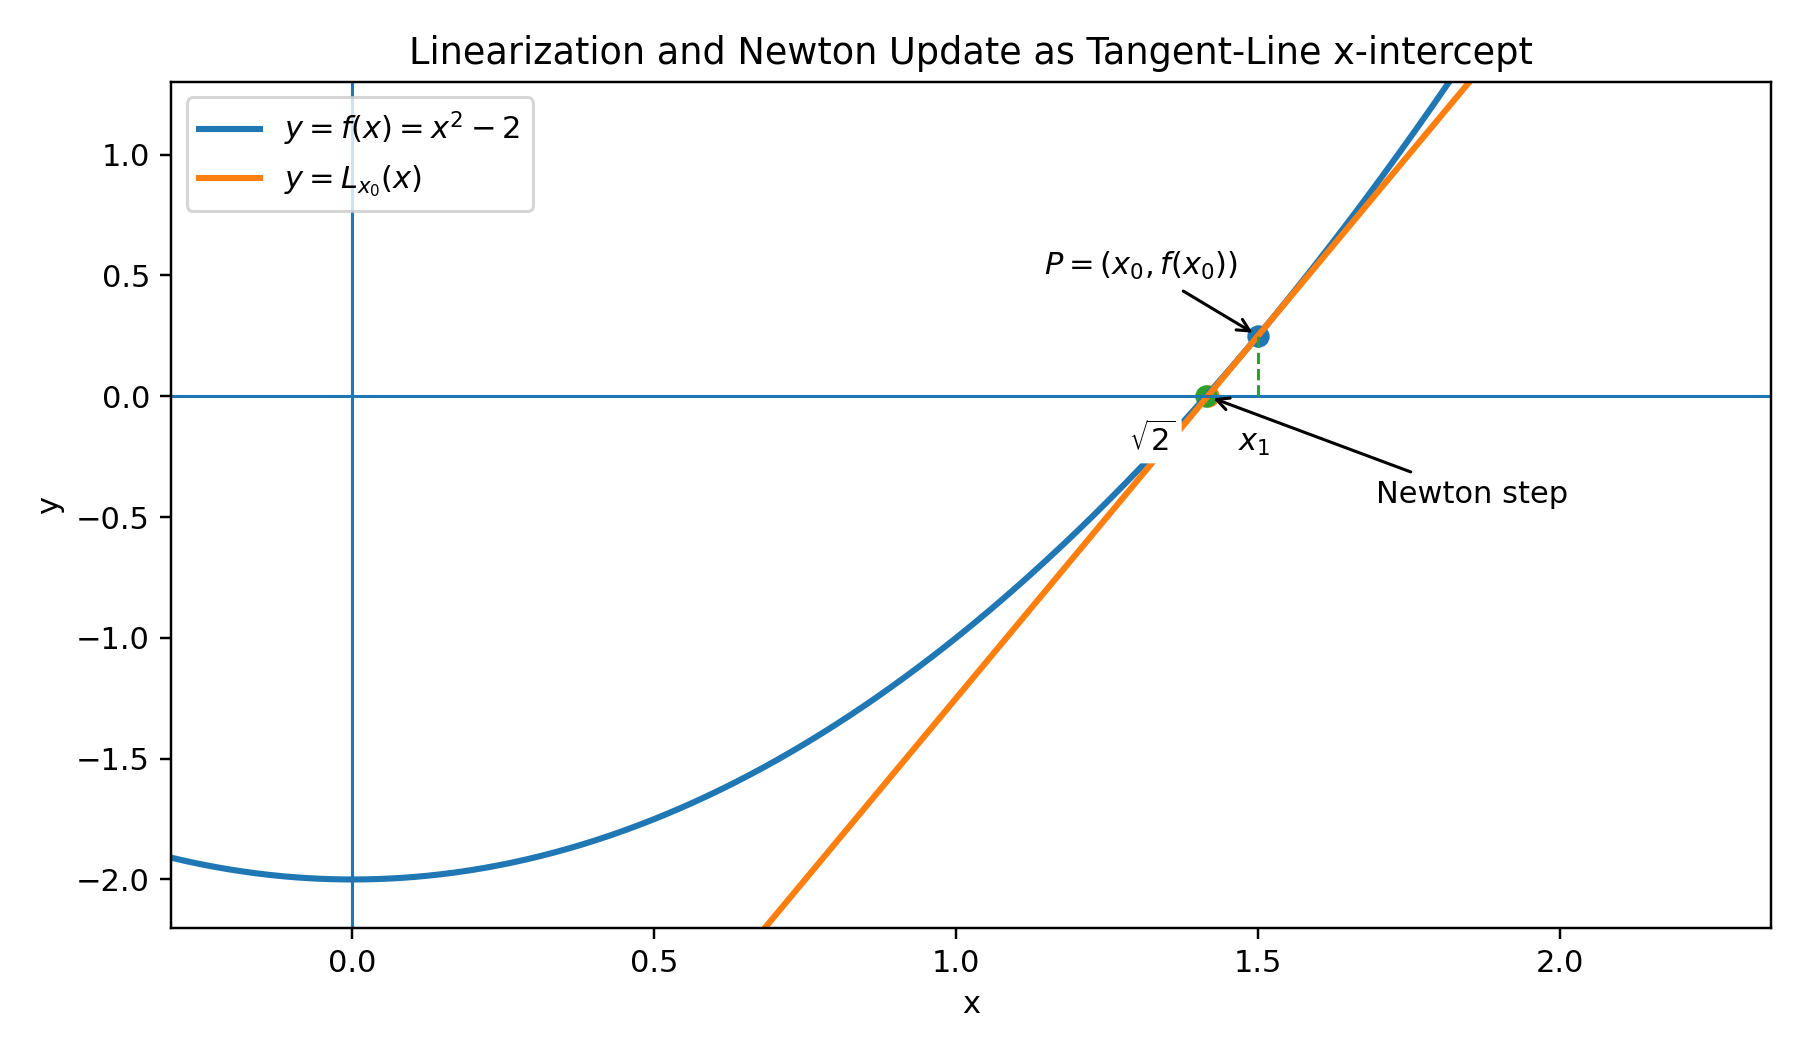

In [7]:
from IPython.display import Image
Image('/mnt/data/newton_linearization_static.png')

# **Linearization as The Tangent Line and The Newton Update as Its $x$-Intercept**


The blue curve is the graph of $f(x)=x^2-2$, whose positive root is $\sqrt{2}$.
Starting from the initial guess $x_0$ (here $x_0=1.5$), we mark the point
$P=(x_0,f(x_0))$ on the curve and replace the nonlinear function near $x_0$
by its *linearization* (tangent line)
    
$$ L_{x_0}(x)=f(x_0)+f'(x_0)(x-x_0), \qquad \text{with } f'(x)=2x.$$
    

The key geometric step is that the next approximation $x_1$ is obtained by solving the *linear* equation $L_{x_0}(x)=0$, i.e.\ by taking the $x$-intercept of the tangent line:

$$x_1=x_0-\frac{f(x_0)}{f'(x_0)}.$$

Thus Newton's method is repeated linearization: each iterate is found by replacing $f$ with its tangent line at the current point and using the tangent line's root as the next estimate. In the diagram, the intercept $x_1$ lies closer to the true root $\sqrt{2}$ than $x_0$, illustrating how the tangent-line model improves the approximation.

In [ ]:
import numpy as np
import plotly.graph_objects as go

# ----------------------------
# Example: f(x)=x^2-2
# ----------------------------
def f(x):
    return x**2 - 2

def fp(x):
    return 2*x


# ----------------------------
# Newton iterates with early stopping
# ----------------------------
def newton_iterates(f, fp, x0, n_max=100, tol_f=1e-12, tol_x=1e-12, min_df=1e-14):
    xs = [float(x0)]
    k_conv = 0
    for k in range(n_max):
        xk = xs[-1]
        fx = float(f(xk))
        dfx = float(fp(xk))

        if abs(fx) < tol_f:
            k_conv = k
            break

        if abs(dfx) < min_df:
            print(f"Stopped: |f'(x)| too small at x = {xk:.16g}")
            k_conv = k
            break

        x_next = xk - fx/dfx
        xs.append(float(x_next))

        if abs(x_next - xk) < tol_x:
            k_conv = k + 1
            break

        k_conv = k + 1

    return xs, k_conv


# ----------------------------
# Teaching-quality geometry animation:
# - slider goes to n_max (e.g., 100)
# - after convergence, frames "hold" the final state
# - tangent + markers never vanish (fixed trace indices)
# - path traces show the motion of iterates
# ----------------------------
def newton_geometry_plot(
    f, fp,
    x0=1.5,
    n_max=100,              # slider frames: k=0..n_max-1
    tol_f=1e-12,
    tol_x=1e-12,
    x_min=-0.3, x_max=2.35,
    y_min=-2.2, y_max=1.3,
    n_grid=900,
    frame_ms=240,           # moderate speed
    transition_ms=180       # smooth-ish transition
):
    X, k_conv = newton_iterates(f, fp, x0, n_max=n_max, tol_f=tol_f, tol_x=tol_x)

    # function curve
    grid_x = np.linspace(x_min, x_max, n_grid)
    grid_y = f(grid_x)

    # helper: hold last iterate after convergence
    def x_at(k):
        return X[k] if k < len(X) else X[-1]

    # ---- Base figure with FIXED trace list ----
    fig = go.Figure()

    # Trace 0: function curve (static)
    fig.add_trace(go.Scatter(x=grid_x, y=grid_y, mode="lines", name="y=f(x)"))

    # Trace 1: tangent line (updated each frame)
    fig.add_trace(go.Scatter(x=grid_x, y=grid_y*0, mode="lines", name="tangent (linearization)"))

    # Trace 2: point Pk=(xk,f(xk)) (updated each frame)
    fig.add_trace(go.Scatter(x=[x0], y=[f(x0)], mode="markers+text", name="P=(x_k,f(x_k))",
                             text=[""], textposition="bottom left"))

    # Trace 3: x_{k+1} on x-axis (updated each frame)
    fig.add_trace(go.Scatter(x=[x0], y=[0], mode="markers+text", name="x_{k+1} (tangent intercept)",
                             text=[""], textposition="bottom right"))

    # Trace 4: dashed vertical drop at xk (updated each frame)
    fig.add_trace(go.Scatter(x=[x0, x0], y=[0, f(x0)], mode="lines", name="drop at x_k",
                             line=dict(dash="dash")))

    # Trace 5: dashed vertical at x_{k+1} up to f(x_{k+1}) (updated each frame)
    fig.add_trace(go.Scatter(x=[x0, x0], y=[0, f(x0)], mode="lines", name="drop at x_{k+1}",
                             line=dict(dash="dash")))

    # Trace 6: trajectory on x-axis: (x0,0)->(x1,0)->... (updated cumulatively)
    fig.add_trace(go.Scatter(x=[x0], y=[0], mode="lines+markers", name="iterates on x-axis"))

    # Trace 7: trajectory on curve: (x0,f(x0))->(x1,f(x1))->... (updated cumulatively)
    fig.add_trace(go.Scatter(x=[x0], y=[f(x0)], mode="lines+markers", name="iterates on curve"))

    # axes lines as shapes (static)
    fig.add_shape(type="line", x0=x_min, y0=0, x1=x_max, y1=0, line=dict(width=1))
    fig.add_shape(type="line", x0=0, y0=y_min, x1=0, y1=y_max, line=dict(width=1))

    # ---- Frames: update traces [1..7] consistently ----
    frames = []
    for k in range(n_max):
        xk = x_at(k)
        yk = float(f(xk))
        mk = float(fp(xk))
        bk = yk - mk*xk

        tangent_y = mk*grid_x + bk

        xkp1 = x_at(k+1)
        ykp1_curve = float(f(xkp1))

        # cumulative paths (stop growing after convergence, but keep shown)
        upto = min(k+1, len(X)-1)  # last *computed* index available
        path_x = [X[i] for i in range(upto+1)]
        path_y0 = [0 for _ in range(upto+1)]
        path_ycurve = [float(f(X[i])) for i in range(upto+1)]

        status = " (converged; holding)" if k >= k_conv else ""

        annotation_text = (
            f"<b>Frame k={k}</b><br>"
            f"Converged at k={k_conv}<br>"
            f"x{k} = {xk:.12f}<br>"
            f"f(x{k}) = {yk:.3e}<br>"
            f"f'(x{k}) = {mk:.6f}<br>"
            f"x{k+1} = {xkp1:.12f}{status}"
        )

        frames.append(go.Frame(
            name=str(k),
            # IMPORTANT: data order matches trace indices in 'traces'
            data=[
                go.Scatter(x=grid_x, y=tangent_y),                                  # trace 1
                go.Scatter(x=[xk], y=[yk], text=[f"P=(x{k}, f(x{k}))"+status]),     # trace 2
                go.Scatter(x=[xkp1], y=[0], text=[f"x{k+1}"]),                      # trace 3
                go.Scatter(x=[xk, xk], y=[0, yk]),                                  # trace 4
                go.Scatter(x=[xkp1, xkp1], y=[0, ykp1_curve]),                      # trace 5
                go.Scatter(x=path_x, y=path_y0),                                   # trace 6
                go.Scatter(x=path_x, y=path_ycurve),                               # trace 7
            ],
            # Tell Plotly exactly which traces are being updated:
            traces=[1,2,3,4,5,6,7],
            layout=go.Layout(
                annotations=[dict(
                    x=0.02, y=0.90, xref="paper", yref="paper",
                    text=annotation_text, showarrow=False,
                    align="left", bordercolor="black", borderwidth=1,
                    bgcolor="white"
                )]
            )
        ))

    fig.frames = frames

    # ---- Slider & controls ----
    steps = [
        dict(
            method="animate",
            args=[[str(k)], dict(
                mode="immediate",
                frame=dict(duration=frame_ms, redraw=False),   # redraw=False helps prevent vanishing
                transition=dict(duration=transition_ms)
            )],
            label=f"k={k}"
        )
        for k in range(n_max)
    ]

    fig.update_layout(
        title=f"Newton’s Method = Repeated Linearization (Frames k=0..{n_max-1}, early-stop at k={k_conv})",
        xaxis_title="x",
        yaxis_title="y",
        xaxis=dict(range=[x_min, x_max]),
        yaxis=dict(range=[y_min, y_max]),
        hovermode="x unified",
        height=650,
        updatemenus=[dict(
            type="buttons",
            direction="left",
            x=0.08, y=1.12,
            buttons=[
                dict(
                    label="Play",
                    method="animate",
                    args=[None, dict(
                        fromcurrent=True,
                        frame=dict(duration=frame_ms, redraw=False),
                        transition=dict(duration=transition_ms)
                    )]
                ),
                dict(
                    label="Pause",
                    method="animate",
                    args=[[None], dict(
                        mode="immediate",
                        frame=dict(duration=0, redraw=False),
                        transition=dict(duration=0)
                    )]
                ),
            ],
        )],
        sliders=[dict(
            active=0,
            y=1.06, x=0.08, len=0.86,
            currentvalue=dict(prefix="Frame: "),
            steps=steps
        )]
    )

    return fig, X, k_conv


# ---- Run ----
fig, X, k_conv = newton_geometry_plot(f, fp, x0=1.5, n_max=100, tol_f=1e-12, tol_x=1e-12)
print("Converged at step:", k_conv)
print("Last computed x:", X[-1], "  |f(x)| =", abs(f(X[-1])))
fig.show()


Converged at step: 4
Last computed x: 1.4142135623730951   |f(x)| = 4.440892098500626e-16


## **What the Newton--Linearization Animation Demonstrates**

### **Core Idea: Repeated Linearization**
The animation visualizes Newton's method as *repeated linearization* of a nonlinear function. Given a differentiable function $f$ and the root-finding problem

$$
f(x)=0,
$$
Newton's method constructs, at each iterate $x_k$, the tangent-line (first-order Taylor) approximation
$$
L_k(x)=f(x_k)+f'(x_k)(x-x_k).
$$
Instead of solving $f(x)=0$ directly, Newton replaces it by the easier *linear* equation
$$
L_k(x)=0,
$$
whose unique solution (when $f'(x_k)\neq 0$) is
$$
x_{k+1}=x_k-\frac{f(x_k)}{f'(x_k)}.
$$
Geometrically, $x_{k+1}$ is the **$x$-intercept of the tangent line** to $y=f(x)$ at the point $P_k=(x_k,f(x_k))$.

### **What the Animation Highlights Mathematical Perspective**
As the slider advances through frames $k=0,1,2,\dots$, the animation simultaneously emphasizes:


- **Local model building:** At each step $k$, the nonlinear curve $y=f(x)$ is replaced near $x_k$ by the linear model $y=L_k(x)$.

- **Newton update as a geometric operation:** The next iterate $x_{k+1}$ is displayed as the intersection of $L_k$ with the $x$-axis. This makes the formula
$x_{k+1}=x_k-\frac{f(x_k)}{f'(x_k)}$ visible as a geometric construction.

- **Error reduction and convergence:** The plotted trajectories show the sequence $\{x_k\}$ approaching the true root $\alpha$. When the method converges, both $|f(x_k)|$ and the step size $|x_{k+1}-x_k|$ become small, and the updates stabilize.

- **Convergence in Few Effective Steps, but Long Timeline for Teaching.**
Although Newton often converges rapidly, the slider is extended to a fixed horizon (e.g. $k=100$) by *holding* the final converged state in subsequent frames. This illustrates that convergence can occur early, after which the
algorithm effectively stops changing.

### **How to Read the Animation to Understand the Algorithm**

Fix a frame $k$ and interpret the objects in the plot:


-  The **curve** is $y=f(x)$ (the true nonlinear problem).
-  The **current point** $P_k=(x_k,f(x_k))$ is where we linearize.
-  The **tangent line** $y=L_k(x)$ is the linear approximation of $f$ near $x_k$.
-  The **$x$-intercept** of $L_k$ is $x_{k+1}$ (the Newton update).
-  The **path on the $x$-axis** traces $(x_0,0),(x_1,0),\dots$ to show how the iterates move.
-  The **path on the curve** traces $(x_0,f(x_0)),(x_1,f(x_1)),\dots$ to show how function values shrink.


Thus each frame encodes the single logical step:
$$
\boxed{\text{evaluate } f(x_k),f'(x_k)\;\Longrightarrow\;\text{build }L_k\;\Longrightarrow\;\text{solve }L_k(x)=0\;\Longrightarrow\;x_{k+1}.}
$$

### **Early Stopping and Padding (Algorithmic Meaning)**
In computation, one typically stops Newton's method when the root is approximated to the desired tolerance. Two standard stopping tests are:

$$|f(x_k)|<\varepsilon_f \qquad\text{or}\qquad |x_{k+1}-x_k|<\varepsilon_x.$$

For visualization, however, we may still create a fixed number of frames (e.g. $100$) for the slider. After convergence, the animation **pads** the remaining frames by repeating the final state. This teaches two facts at once:

-  Newton converges quickly (few meaningful updates).
-  A long slider can still be used to inspect stability after convergence.


## **Pseudocode for the Newton--Linearization Animation**

### **Numerical core: Newton Iteration with Early Stopping**

- **Input:** function $f$, derivative $f'$, initial guess $x_0$,  
maximum iterations/frames $N$, tolerances $\varepsilon_f,\varepsilon_x$

- **Output:** iterate list $X=[x_0,x_1,\dots,x_{k_{\text{conv}}}]$ and convergence index  $k_{\text{conv}}=\text{len}(X)-1$

```text
Algorithm: Newton Iteration with Early Stopping

1. X ← [x0]

2. for k = 0 to N−1 do
      x ← last element of X

      if |f(x)| < ε_f then
          break
      end if

      x_new ← x − f(x) / f'(x)

      append x_new to X

      if |x_new − x| < ε_x then
          break
      end if
   end for

3. k_conv ← len(X) − 1

4. return (X, k_conv)
```

---

### **Visualization core: Building Frames and Padding to $N$**
#### **Frame Construction for the Animation (with Padding After Convergence)**

**Input:** iterate list $X=[x_0,\dots,x_{k_{\text{conv}}}]$, maximum frames $N$

**Output:** list of animation frames + slider/play controls

```text
Algorithm: Frame Construction (Newton Geometry Animation)

1. frames ← empty list

2. for k = 0 to N−1 do

      # Hold the state after convergence so slider can reach N
      if k ≤ k_conv then
          x_k ← X[k]
      else
          x_k ← X[k_conv]
      end if

      # Build tangent line (linearization) on a plotting grid
      L_k(x) ← f(x_k) + f'(x_k) * (x − x_k)

      # Define the next point x_{k+1} (also held after convergence)
      if (k+1) ≤ k_conv then
          x_{k+1} ← X[k+1]
      else
          x_{k+1} ← X[k_conv]
      end if

      # Update geometric objects for this frame
      update marker at P_k = (x_k, f(x_k))
      update marker at (x_{k+1}, 0)   # tangent x-intercept
      update dashed guides at x_k and x_{k+1}

      # Update trajectories (paths), only up to the computed iterates
      upto ← min(k, k_conv)
      update path on x-axis using (X[0..upto], 0)
      update path on curve  using (X[0..upto], f(X[0..upto]))

      # Store the full scene as frame k
      frames.append(frame labeled "k")

   end for

3. build slider steps for k = 0..N−1 and attach Play/Pause controls

4. return (frames + slider/play controls)
```

## **How Python Generates the Plot and The Animation**
In Python, the construction has three layers:

- **Mathematical Layer:** Define $f$ and $f'$ as Python functions, implement the Newton update $x\mapsto x-\frac{f(x)}{f'(x)}$, and compute iterates until stopping criteria are met.

- **Geometric Layer:** for each iterate $x_k$, compute the tangent line explicitly on a grid:

$$L_k(x)=f(x_k)+f'(x_k)(x-x_k)=f'(x_k)\,x+\bigl(f(x_k)-f'(x_k)x_k\bigr).$$

> This turns the calculus idea ``tangent line'' into arrays of points to plot.

- **Animation layer (Plotly):** build a base figure with a fixed set of traces (curve, tangent, markers, guides, paths), then create a list of Plotly frames that *update the same trace indices* at each $k$. A slider is created with steps labeled $k=0,1,\dots,N-1$, and a Play button cycles through frames at a chosen speed.

## **Using the Animation to Learn the Mathematics**
When students *play* the animation or drag the slider, they should repeatedly ask:

- **Where are we linearizing?** -- Identify the point $P_k=(x_k,f(x_k))$.
\item \textbf{What is the local linear model?} Observe the tangent line $L_k$ as the graph of the first-order Taylor model.
-  **How is the next iterate chosen?** -- Read $x_{k+1}$ as the $x$-intercept of $L_k$.
-  **Is the method converging?** -- Watch the trajectory: $x_k$ stabilizes, and $|f(x_k)|$ shrinks toward $0$.
- **What does convergence mean visually?** -- After convergence, the frames become identical (holding state), reflecting the fact that the algorithm has met its stopping criterion.

> In this way, the animation links formula, geometry, and computation into a single coherent picture:

$$\boxed{\text{Newton's method is the algorithmic implementation of tangent-line approximation.}}$$



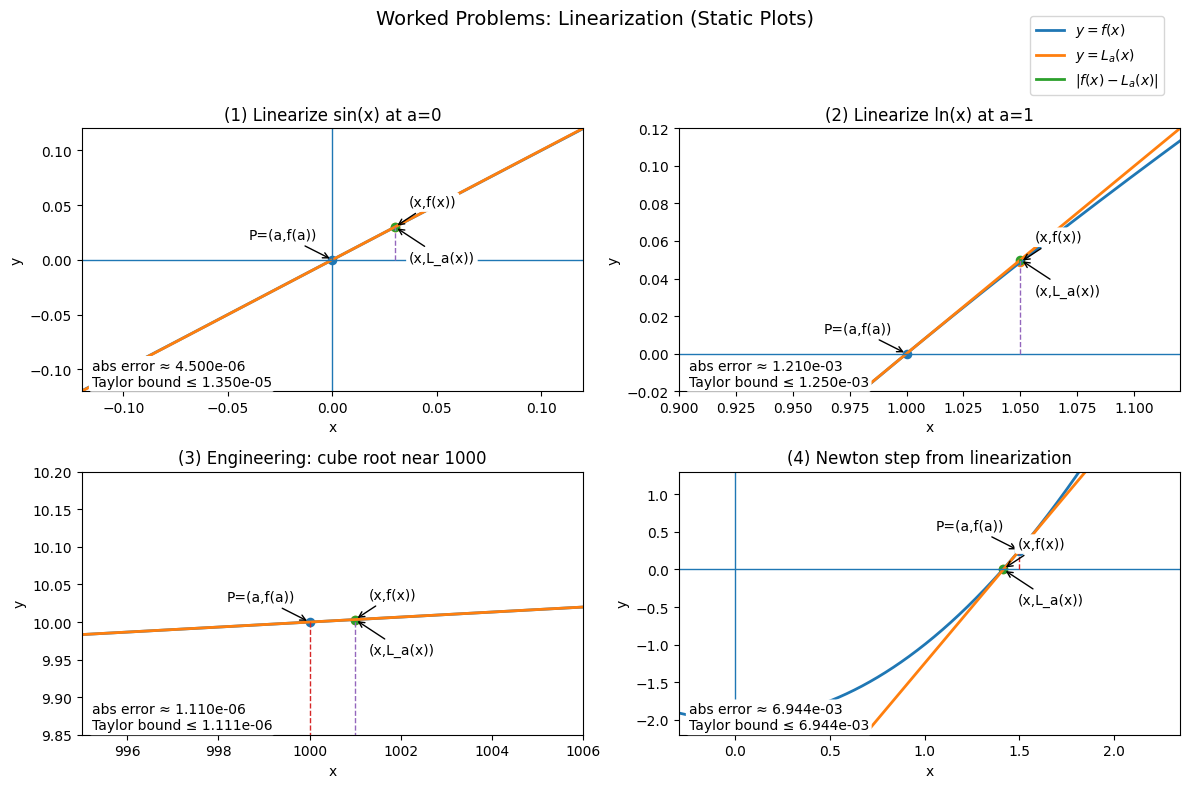

Saved to: /mnt/data/linearization_worked_problems_static.png


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os

# -----------------------------
# Helpers
# -----------------------------
def linearization(f, fp, a):
    fa = float(f(a))
    m = float(fp(a))
    return lambda x: fa + m*(x - a), fa, m

def taylor_error_bound(M, dx):
    return 0.5 * M * (dx**2)

# -----------------------------
# Problems setup
# -----------------------------
problems = []

# (1) sin x at 0, x=0.03
f1  = lambda x: np.sin(x)
fp1 = lambda x: np.cos(x)
a1, x1 = 0.0, 0.03
M1 = 0.03
problems.append(dict(
    name="(1) Linearize sin(x) at a=0",
    f=f1, fp=fp1, a=a1, x=x1, M=M1,
    xlim=(-0.12, 0.12), ylim=(-0.12, 0.12)
))

# (2) ln x at 1, x=1.05
f2  = lambda x: np.log(x)
fp2 = lambda x: 1/x
a2, x2 = 1.0, 1.05
M2 = 1.0
problems.append(dict(
    name="(2) Linearize ln(x) at a=1",
    f=f2, fp=fp2, a=a2, x=x2, M=M2,
    xlim=(0.9, 1.12), ylim=(-0.02, 0.12)
))

# (3) cube root at 1000, x=1001
f3  = lambda x: x**(1/3)
fp3 = lambda x: (1/3)*x**(-2/3)
a3, x3 = 1000.0, 1001.0
M3 = 2/900000
problems.append(dict(
    name="(3) Engineering: cube root near 1000",
    f=f3, fp=fp3, a=a3, x=x3, M=M3,
    xlim=(995, 1006), ylim=(9.85, 10.20)
))

# (4) Newton step demo: f(x)=x^2-2, a=1.5
f4  = lambda x: x**2 - 2
fp4 = lambda x: 2*x
a4 = 1.5
x4 = a4 - f4(a4)/fp4(a4)  # Newton update
M4 = 2.0
problems.append(dict(
    name="(4) Newton step from linearization",
    f=f4, fp=fp4, a=a4, x=x4, M=M4,
    xlim=(-0.3, 2.35), ylim=(-2.2, 1.3)
))

# -----------------------------
# Summaries (error + Taylor bound)
# -----------------------------
summaries = []
for p in problems:
    L, fa, m = linearization(p["f"], p["fp"], p["a"])
    fx = float(p["f"](p["x"]))
    Lx = float(L(p["x"]))
    summaries.append(dict(
        err=abs(fx - Lx),
        bound=taylor_error_bound(p["M"], abs(p["x"] - p["a"])),
        fa=fa, m=m, fx=fx, Lx=Lx
    ))

# -----------------------------
# Static plot: 2x2 subplots
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for ax, p, s in zip(axes, problems, summaries):
    f, fp = p["f"], p["fp"]
    a, x = p["a"], p["x"]
    L, fa, m = linearization(f, fp, a)

    xs = np.linspace(p["xlim"][0], p["xlim"][1], 900)
    fx = float(f(x))
    Lx = float(L(x))

    # curves
    ax.plot(xs, f(xs), linewidth=2, label=r"$y=f(x)$")
    ax.plot(xs, L(xs), linewidth=2, label=r"$y=L_a(x)$")

    # axes lines
    ax.axhline(0, linewidth=1)
    ax.axvline(0, linewidth=1)

    # key points
    ax.scatter([a], [fa], s=35)
    ax.scatter([x], [fx], s=35)
    ax.scatter([x], [Lx], s=35)

    # error segment
    ax.plot([x, x], [Lx, fx], linewidth=2, label=r"$|f(x)-L_a(x)|$")

    # dashed guides
    ax.plot([a, a], [0, fa], linestyle="--", linewidth=1)
    ax.plot([x, x], [0, Lx], linestyle="--", linewidth=1)

    # annotations
    bbox = dict(boxstyle="round,pad=0.2", fc="white", ec="none")
    ax.annotate("P=(a,f(a))", xy=(a, fa), xytext=(-60, 15),
                textcoords="offset points", bbox=bbox,
                arrowprops=dict(arrowstyle="->", linewidth=1))
    ax.annotate("(x,f(x))", xy=(x, fx), xytext=(10, 15),
                textcoords="offset points", bbox=bbox,
                arrowprops=dict(arrowstyle="->", linewidth=1))
    ax.annotate("(x,L_a(x))", xy=(x, Lx), xytext=(10, -25),
                textcoords="offset points", bbox=bbox,
                arrowprops=dict(arrowstyle="->", linewidth=1))

    # formatting
    ax.set_xlim(*p["xlim"])
    ax.set_ylim(*p["ylim"])
    ax.set_title(p["name"])
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    # show numeric error and bound
    ax.text(0.02, 0.02,
            f"abs error ≈ {s['err']:.3e}\nTaylor bound ≤ {s['bound']:.3e}",
            transform=ax.transAxes, bbox=bbox)

fig.suptitle("Worked Problems: Linearization (Static Plots)", y=0.98, fontsize=14)

# one shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(0.98, 0.98), frameon=True)

fig.tight_layout(rect=[0, 0, 1, 0.92])

# save
static_path = "/mnt/data/linearization_worked_problems_static.png"
os.makedirs(os.path.dirname(static_path), exist_ok=True)
fig.savefig(static_path, dpi=220)
plt.show()

print("Saved to:", static_path)


## **Computational Approach —  Linearization Plots**

This notebook cell builds a **single static figure** (a 2×2 grid) that visualizes the idea of **linearization** for four worked problems.  
For each problem we plot:

- The original function $y=f(x)$,
- The linearization (tangent-line model) $y=L_a(x)$,
- The points $P=(a,f(a))$, $(x,f(x))$, and $(x,L_a(x))$,
- The vertical error segment $|f(x)-L_a(x)|$,
- And a Taylor-style error bound $\le \frac{M}{2}(x-a)^2$.

---

### **1) Data model: Storing Each Worked Problem**

The code builds a list called `problems`, where each item is a dictionary containing:

- `f` and `fp`: the function $f$ and its derivative $f'$
- `a`: base point of linearization
- `x`: nearby evaluation point
- `M`: a bound for $|f''|$ on the interval between $a$ and $x$ (used for the   Taylor remainder bound)
- `xlim`, `ylim`: axis limits for clean plots
- `name`: title for each subplot

This makes the plotting loop simple and scalable: add one more problem → it automatically appears as a new subplot.

---

### **2) Core Computation: Linearization and Error Bound**

#### **(a) Linearization Function**
The helper:
```python
def linearization(f, fp, a):
    fa = float(f(a))
    m = float(fp(a))
    return lambda x: fa + m*(x - a), fa, m
```

implements the tangent-line model

$$
L_a(x)=f(a) + f'(a)(x-a)
$$

It returns:

-   A callable function `L(x)`,

-   The value $f(a)$,

-   The slope $f'(a)$.

##### **(b) Taylor error bound**

The helper:

```python
def taylor_error_bound(M, dx):
    return 0.5 * M * (dx**2)
```
implements the first-order Taylor remainder bound:

$$|f(x)-L_a(x)| \le \frac{M}{2}(x-a)^2,$$

where $M$ bounds $∣f′′∣$ on the interval between aaa and $x$.

#### **3) Summary table computation (before plotting)**

```python
summaries = []
for p in problems:
    L, fa, m = linearization(p["f"], p["fp"], p["a"])
    fx = float(p["f"](p["x"]))
    Lx = float(L(p["x"]))
    summaries.append(dict(
        err=abs(fx - Lx),
        bound=taylor_error_bound(p["M"], abs(p["x"] - p["a"])),
        fa=fa, m=m, fx=fx, Lx=Lx
    ))
```
computes the key numerical quantities for each problem:

-    The exact value $f(x),$

-   The approximation $L_a(x)$,

-   The absolute error $|f(x)-L_a(x)|$,

-   The Taylor error bound.

These values are later printed directly onto each subplot.

#### **4) Visualization Strategy: one Figure, 2×2 Subplots**

We create:

```         
fig, axes = plt.subplots(2, 2, figsize=(12, 8)) axes = axes.ravel()
```

Then we iterate over `(ax, problem, summary)` together.\
For each subplot we:

1.   Sample a plotting grid `xs` using `np.linspace(...)`

2.   Plot:

- $f(xs)$ (curve)
- $L_a(xs)$ (tangent line)

3.  Add points and guides:

    -   $P=(a,f(a))$

    -   $(x,f(x))$

    -   $(x,L_a(x))$

    -   vertical error segment

    -   dashed guide lines at $a$ and $x$

4.   Attach text annotations and a small error/bound box

This produces a consistent “template” visualization for all problems.

## **How to “Read” the Plots Mathematically While Looking at Them**

For each subplot:

-   The blue curve is $y=f(x)$.

-   The orange line is $y=L_a(x)$.

-   The point $P=(a,f(a))$ shows where the tangent line is attached.

-   At the chosen nearby input $x$:

    -   The point $(x,f(x))$ is the exact value,

    -   The point $(x,L_a(x))$ is the approximation,

    -   And the vertical distance is the actual error $|f(x)-L_a(x)|$.

-    The displayed Taylor bound tells you a guaranteed upper limit for the error (given the chosen $M$).

> This connects the geometry (tangent approximation) to computation (numerical error + theoretical bound).


# **Closing Note**
Linearization is not merely a trick: it is the first instance of a deep theme in analysis; **a differentiable function is locally well-approximated by its first-order Taylor polynomial.** Once this is understood, Newton's method, error control, and higher-order Taylor expansions all become natural extensions.